<a href="https://colab.research.google.com/github/Sarath-kumar-0-3/Data_Science_lab/blob/main/Exp3pods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
value = df.isnull().sum()
print(value)

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


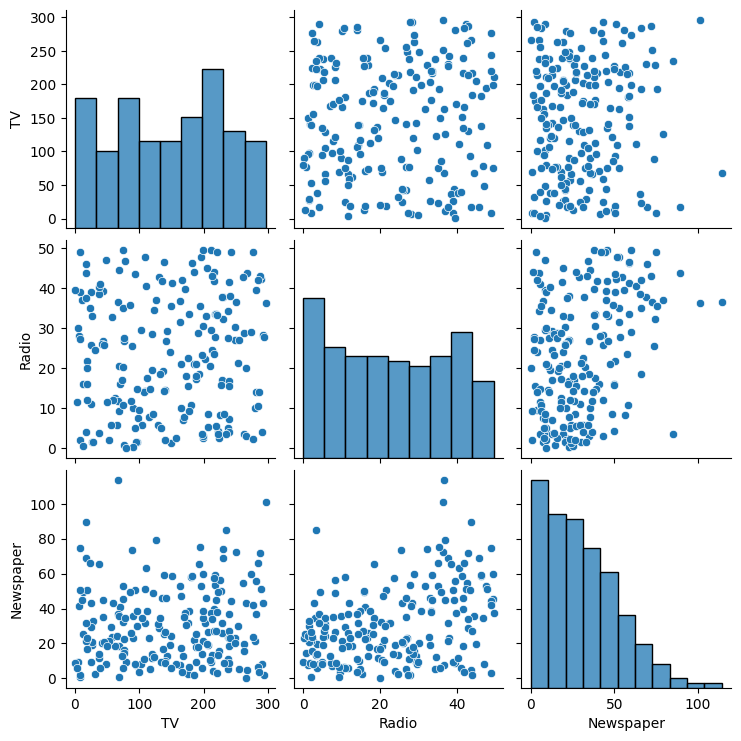

In [6]:

features = df[['TV', 'Radio', 'Newspaper']]
target = df['Sales']
sns.pairplot(features)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (160, 3)
Test set size: (40, 3)


In [9]:
from sklearn.linear_model import LinearRegression


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [22]:
y_pred_lr = model.predict(X_test)
print(y_pred_lr)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


[16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967  9.04831992  6.65328312
 14.34554487  8.90349333  9.68959028 12.16494386  8.73628397 16.26507258
 10.27759582 18.83109103 19.56036653 13.25103464 12.33620695 21.30695132
  7.82740305  5.80957448 20.75753231 11.98138077  9.18349576  8.5066991
 12.46646769 10.00337695 21.3876709  12.24966368 18.26661538 20.13766267
 14.05514005 20.85411186 11.0174441   4.56899622]
Mean Squared Error: 3.1740973539761033
R² Score: 0.899438024100912


In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


In [13]:
poly_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])


In [23]:
poly_model.fit(X_train,y_train)
y_pred_ploy=poly_model.predict(X_test)
print(y_pred_ploy)

[17.25443578 22.7193321  20.42799436  7.542709   24.37103037 12.55927164
 22.80784986  8.34371358 12.0586023  15.69024565  7.89166367  8.27082715
 11.86055971  6.16591094 10.57664393 12.3628954   6.74390963 16.65082111
 10.68661722 19.03888161 20.15223945 13.1137814   9.56273868 22.10675225
  8.96725241  7.7794437  22.40745151 12.72065973 10.25529986  6.22368636
 11.64677688 10.22431946 23.39763949  9.17403232 15.36143449 21.05675814
 10.9795286  20.23370753 11.85153256  6.58779915]


In [25]:
mse = mean_squared_error(y_test,y_pred_ploy)
r2 = r2_score(y_test,y_pred_ploy)
print("mean square error",mse)
print("r2 score",r2)

mean square error 0.41291022853790765
r2 score 0.9869181490609602


In [16]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [17]:
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

In [19]:
svr_model = SVR(kernel = 'rbf')
svr_model.fit(X_train_scaled,y_train)

SVR()

In [26]:
y_pred_svr = svr_model.predict(X_test_scaled)
print(y_pred_svr)

[17.1879597  21.60497277 19.5802057   9.76637843 19.9549199  12.49691541
 21.90662014  8.54092114 12.05397226 15.48663882 10.17794981  8.61178416
 13.97631053  9.4580635  10.54216619 12.10531593  8.74714797 16.71637704
 10.58482551 19.00568943 19.38760196 14.02247701 11.42608949 20.69462286
  9.86435228  8.22058526 21.92089844 12.51921605 10.02697299  9.87735666
 11.49511118 10.34489958 21.39334353 12.16161508 15.22538296 20.09417509
 12.67013175 19.48580633 11.88327125  7.75758153]


In [27]:
mse = mean_squared_error(y_test,y_pred_svr)
r2 = r2_score(y_test,y_pred_svr)
print("mean square error",mse)
print("r2 score",r2)

mean square error 2.8621091217425514
r2 score 0.909322457245777


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


models = ['Linear','Polynomial','SVR']
mae =[]
mse =[]
rmse=[]
for preds in [y_pred_lr,y_pred_ploy,y_pred_svr]:
  mae.append(mean_absolute_error(y_test,preds))
  mse.append(mean_squared_error(y_test,preds))
  rmse.append(np.sqrt(mean_squared_error(y_test,preds)))


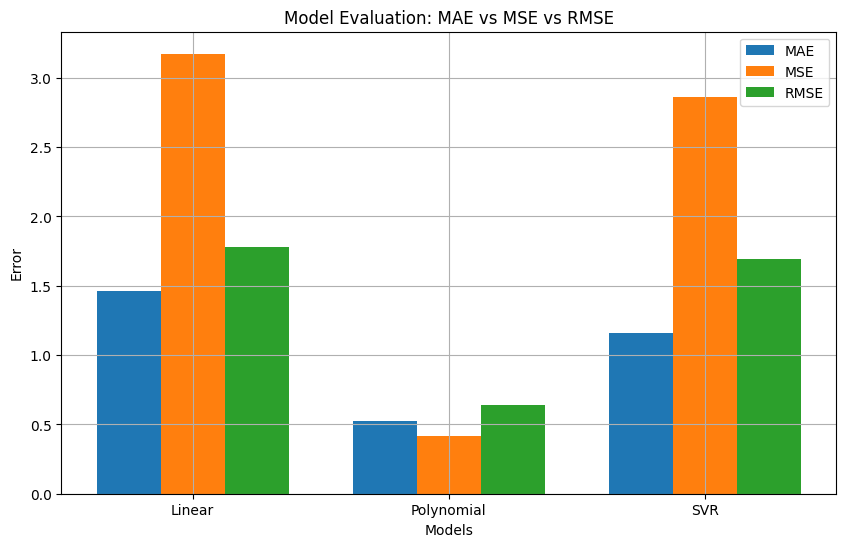

In [30]:
x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, mae, width, label='MAE')
plt.bar(x, mse, width, label='MSE')
plt.bar(x + width, rmse, width, label='RMSE')

plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Model Evaluation: MAE vs MSE vs RMSE')
plt.xticks(x, models)
plt.legend()
plt.grid(True)
plt.show()


In [31]:
from sklearn.cluster import KMeans

In [33]:
kmeans = KMeans(n_clusters =3,random_state =42)
kmeans.fit(features)

KMeans(n_clusters=3, random_state=42)

In [34]:
df['Cluster']=kmeans.labels_

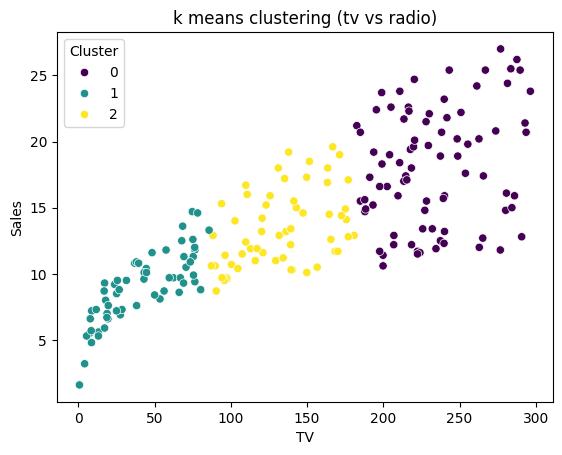

In [39]:
sns.scatterplot(x='TV',y='Sales',hue = 'Cluster',data=df,palette ='viridis')
plt.title("k means clustering (tv vs radio)")
plt.show()